<a href="https://colab.research.google.com/github/Raksantos/A.I-Studying/blob/master/3_Introdu%C3%A7%C3%A3o_a_Machine_Learning_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
mapa = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preço"
}

dados = dados.rename(columns = mapa)

In [ ]:
trocar = {
    0: 1,
    1: 0
}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.tail()

,nao_finalizado,horas_esperadas,preço,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


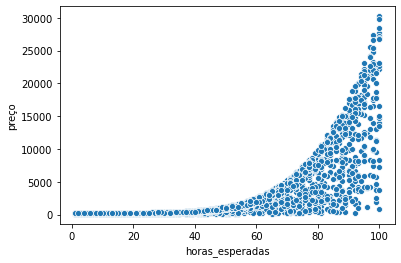

In [ ]:
import seaborn as sns

sns.scatterplot(x ="horas_esperadas", y = "preço", data = dados)

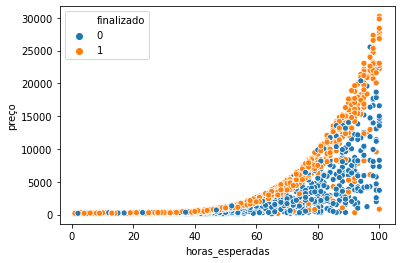

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preço", data=dados, hue="finalizado")

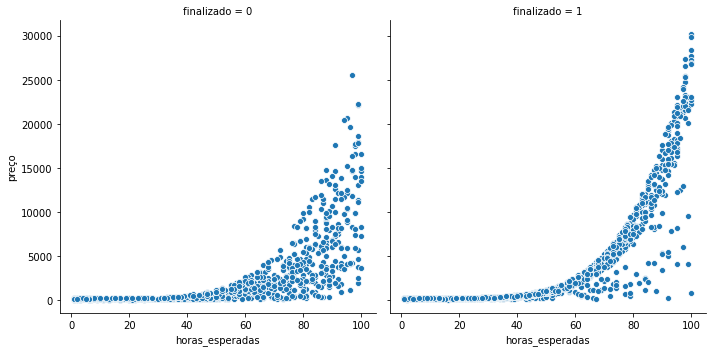

In [ ]:
sns.relplot(x="horas_esperadas", y="preço", data=dados, col="finalizado")

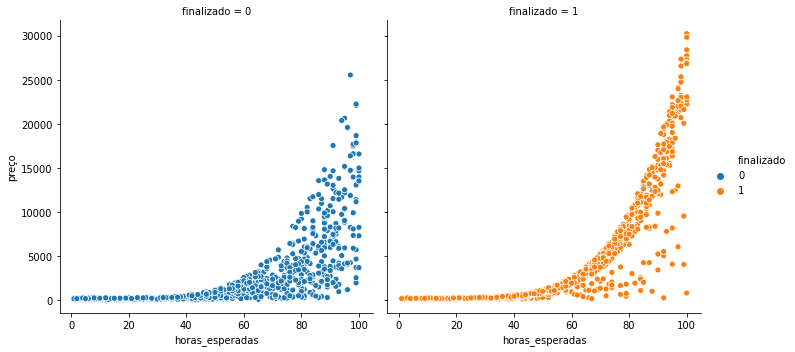

In [ ]:
sns.relplot(x="horas_esperadas", y="preço", data=dados, col="finalizado", hue="finalizado")

In [ ]:
x = dados[["horas_esperadas", "preço"]]
y = dados["finalizado"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 64.44%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


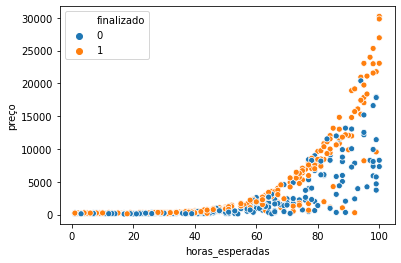

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preço", data=teste_x, hue=teste_y)

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [ ]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

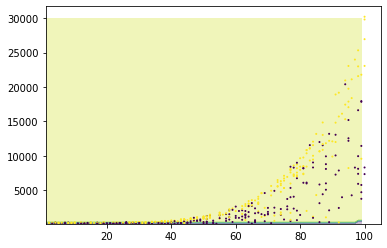

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s = 1)

#DECISION BOUNDARY

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


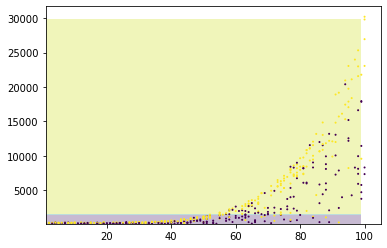

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s = 1)

#DECISION BOUNDARY

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


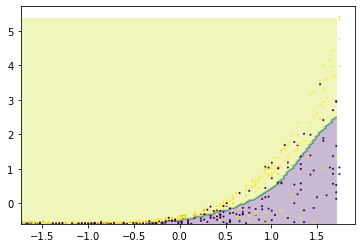

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(data_x, data_y, c=teste_y, s = 1)

#DECISION BOUNDARY